# PRÁCTICA 1: FREESTYLE SEA LEVEL SANTANDER

A continuación se visualizan datos horarios históricos del ***Nivel del mar*** muestreados por el mareógrafo durante 2024 en el puerto de Santnader. Los datos son proporcionados por Puertos del Estado (PdE) a partir del portal PORTUS [https://portus.puertos.es/#/].

Realizado por Guillermo Carballo Lafuente a día 26/11/2025 para la Microcredencial de ***IA2 con Python para Ciencia y Tecnología (II)*** de la Universidad de Cantabria.

### Librerías básicas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genpareto

### Carga de fichero CSV

<div style="text-align: justify">

Una vez cargados los datos se muestra que los datos del nivel del mar están en cm y que los valores no válidos se representan con el número -9999.9. Procedemos a cambiar las unidades al sistema internacional y los valores no válidos como "NaN".

</div>

In [2]:
df = pd.read_csv('PdE_SeaLvl_Santander_2024.csv', sep=';')
print(df.head())

     AA  MM  DD  HH     NM    MM.1     MA  Procedencia
0  2024   1   1   0  191.2 -9999.9  181.2            1
1  2024   1   1   1  198.6    12.0  186.6            1
2  2024   1   1   2  235.1    13.4  221.7            1
3  2024   1   1   3  290.2    13.1  277.1            1
4  2024   1   1   4  351.0    12.2  338.8            1


In [3]:
# Remplazamos los datos no válidos por NaN
df.replace(-9999.9, np.nan, inplace=True)

# Conversión de nivel del mar y mareas a metros
df['NM'] = df['NM'] / 100
df['MM.1'] = df['MM.1'] / 100
df['MA'] = df['MA'] / 100

print(df.head())

     AA  MM  DD  HH     NM   MM.1     MA  Procedencia
0  2024   1   1   0  1.912    NaN  1.812            1
1  2024   1   1   1  1.986  0.120  1.866            1
2  2024   1   1   2  2.351  0.134  2.217            1
3  2024   1   1   3  2.902  0.131  2.771            1
4  2024   1   1   4  3.510  0.122  3.388            1


### Secuencia temporal
<div style="text-align: justify">

En la figura inferior se muestra el ***Nivel del Mar (NM)***, ***Marea astronómica (MA)*** y ***Marea meteorológica (MM)*** en Santander. La secuencia temporal muestra que el ***NM*** presenta una ciclicidad oscilatoria principalmente debido a la componenete de la ***MA*** con una carrera de marea de casi 5 m. Además, en algunos meses se observa una variación de la amplitud de la oscilación de ***MA***que sugiere la presencia de modulaciones asociadas a efectos astronómicos. Por otro lado, la ***MM*** llega a tener una influencia de casi 1 m en el ***NM*** en los momentos cuando llegan a suceder temporles, mientras que en verano. Cabe comentar que el eje medio de la gráfica se sitúa a los 3 m debido a la referencia vertical a la que están medidos los datos por el mareógrafo en el puerto.

</div>


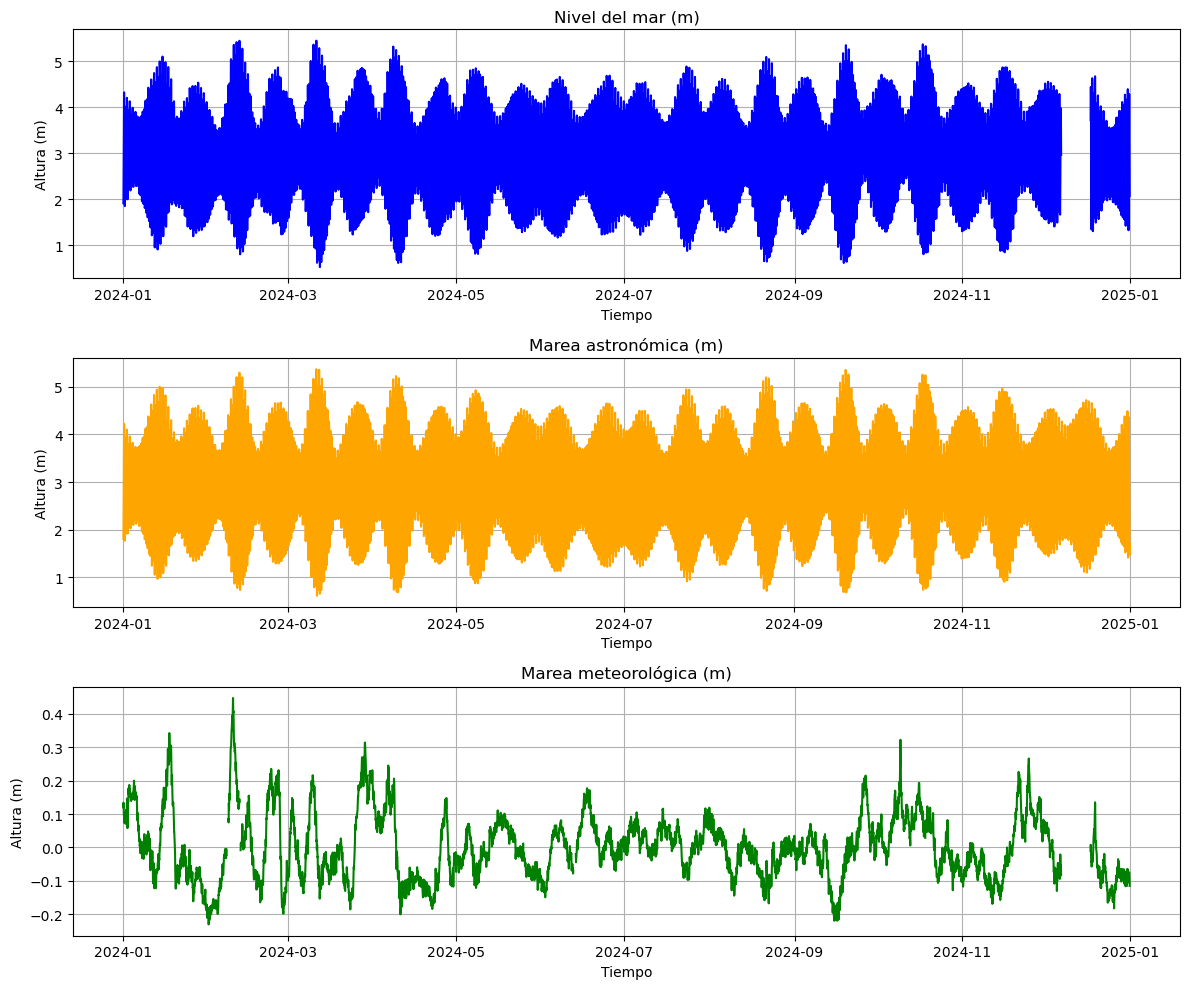

In [4]:
# Creamos una columa datetime a partir de las columnas AA, MM, DD, HH
df['fecha']=  pd.to_datetime(df[['AA', 'MM', 'DD', 'HH']].rename(columns={
    'AA': 'year', 'MM': 'month', 'DD': 'day', 'HH': 'hour'}))


# Graficar cada variable en subplots
plt.figure(figsize=(12, 10))

# Nivel del mar
plt.subplot(3, 1, 1)
plt.plot(df['fecha'], df['NM'], color='blue')
plt.title('Nivel del mar (m)')
plt.xlabel('Tiempo')
plt.ylabel('Altura (m)')
plt.grid(True)

# Marea astronómica
plt.subplot(3, 1, 2)
plt.plot(df['fecha'], df['MA'], color='orange')
plt.title('Marea astronómica (m)')
plt.xlabel('Tiempo')
plt.ylabel('Altura (m)')
plt.grid(True)


# Marea meteorológica
plt.subplot(3, 1, 3)
plt.plot(df['fecha'], df['MM.1'], color='green')
plt.title('Marea meteorológica (m)')
plt.xlabel('Tiempo')
plt.ylabel('Altura (m)')
plt.grid(True)

plt.tight_layout()
plt.show()


### Estadística descriptiva

<div style="text-align: justify">

Al realizar el ***Función de Densidad de Probabilidad (PDF)*** del ***NM*** se muestra un comportamiento bimodal de los datos, con picos a los 2 y ~3.75 m. Este comportamiento bimodal representa los valores más frecuentes por la ***MA*** correspondiendo a las mareas altas y mareas bajas. El rango de valores que se muestra es de 0.5 a 5.5, la misma amplitud que se mostraba en la secuencia temporal. La distribución presenta simetría, reflejando que para la zona dada las variaciones meteorológicas positivas y negativas en la superficie del mar han tenido uan probabilidad similar.

Por otro lado, en la ***Función de Distribución Acumulada*** se llega a observar como la función no es completamente lineal en la pendiente, marcandose puntos de inflexión debido al comportamiento natural de la ***MA*** en la zona. El regimen medio se caracteriza por un ***NM*** en el 50% de los registros inferiores a 2.96 m, mientras que sólo el 5% de los eventos más energéticos supera 4.47 m de altura.

</div>

Valores de NM en percentiles:
  25%: 2.1430 m
  50%: 2.9600 m
  75%: 3.7550 m
  90%: 4.2352 m
  95%: 4.4738 m
  99%: 4.9260 m


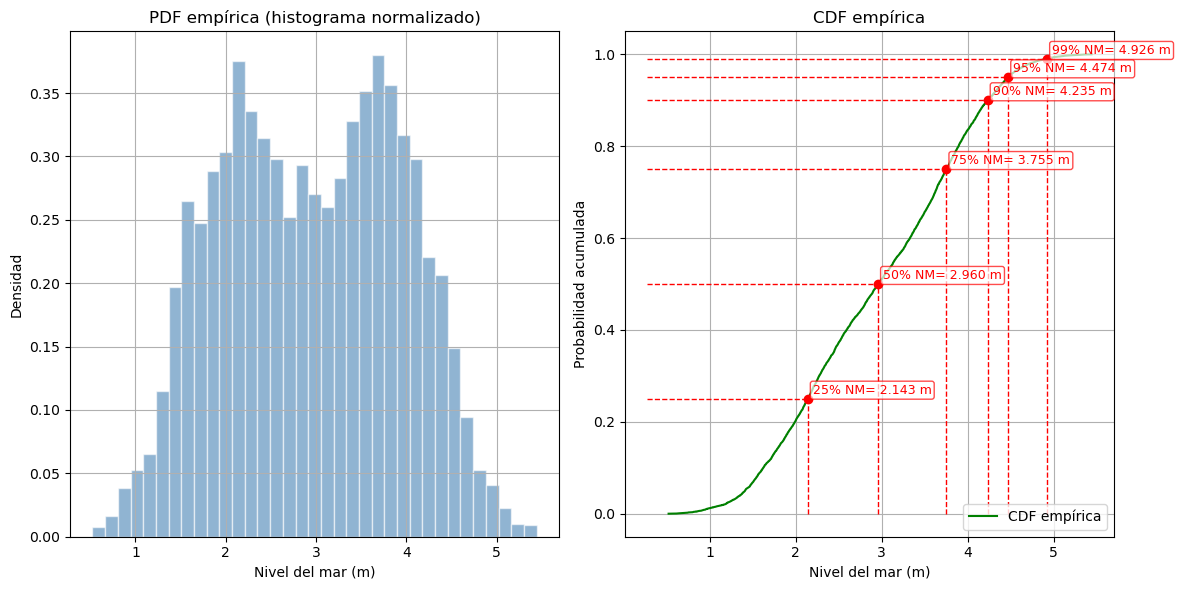

In [ ]:
# Limpiar datos (quitar NaN e infinitos)
nm_values = df['NM'].replace([np.inf, -np.inf], np.nan).dropna()

# --- Percentiles solicitados ---
percentiles = [25, 50, 75, 90, 95, 99]
perc_values = np.percentile(nm_values, percentiles)

# Imprimir los valores de NM en cada percentil
print("Valores de NM en percentiles:")
for p, val in zip(percentiles, perc_values):
    print(f"  {p:>2}%: {val:.4f} m")


# PDF empírica
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(nm_values, bins=35, density=True, alpha=0.6, color='steelblue', edgecolor='white')
plt.title('PDF empírica (histograma normalizado)')
plt.xlabel('Nivel del mar (m)')
plt.ylabel('Densidad')
plt.grid(True)


# CDF empírica
x_sorted = np.sort(nm_values)
cdf_emp = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

ax = plt.subplot(1, 2, 2)
ax.plot(x_sorted, cdf_emp, color='green', label='CDF empírica')
ax.set_title('CDF empírica')
ax.set_xlabel('Nivel del mar (m)')
ax.set_ylabel('Probabilidad acumulada')
ax.grid(True)

# Líneas desde los ejes hasta el punto
x_min = ax.get_xlim()[0]  # límite izquierdo del eje X
for p, x_p in zip(percentiles, perc_values):
    y_p = (x_sorted <= x_p).sum() / len(x_sorted)

    # Línea vertical desde y=0 hasta y=y_p
    ax.plot([x_p, x_p], [0, y_p], color='red', linestyle='--', linewidth=1)

    # Línea horizontal desde x=x_min hasta x=x_p
    ax.plot([x_min, x_p], [y_p, y_p], color='red', linestyle='--', linewidth=1)

    # Punto de intersección
    ax.plot(x_p, y_p, 'o', color='red')

    # Anotación con el percentil y el valor
    ax.annotate(
        f'{p}% NM= {x_p:.3f} m',
        xy=(x_p, y_p),
        xytext=(5, 5),
        textcoords='offset pixels',
        color='red',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', alpha=0.7)
    )

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Estadística extremal

<div style="text-align: justify">

La curva indica que, conforme aumenta el periodo de retorno, el nivel extremo esperado del mar también se incrementa, aunque con una pendiente decreciente que refleja un comportamiento asintótico. Para eventos frecuentes, asociados a periodos cortos, los niveles extremos se sitúan aproximadamente entre 3,0 y 4,0 metros, mientras que para eventos muy raros, con un periodo de retorno cercano a 500 años, el nivel extremo alcanza alrededor de 5,2 metros. Además, el intervalo de confianza del 95% es estrecho, lo que evidencia una buena estabilidad y fiabilidad del modelo.

</div>

Shape (ξ): -0.253329022413599
Scale (σ): 0.3853818162570023
Umbral (u): 4.235200000000001


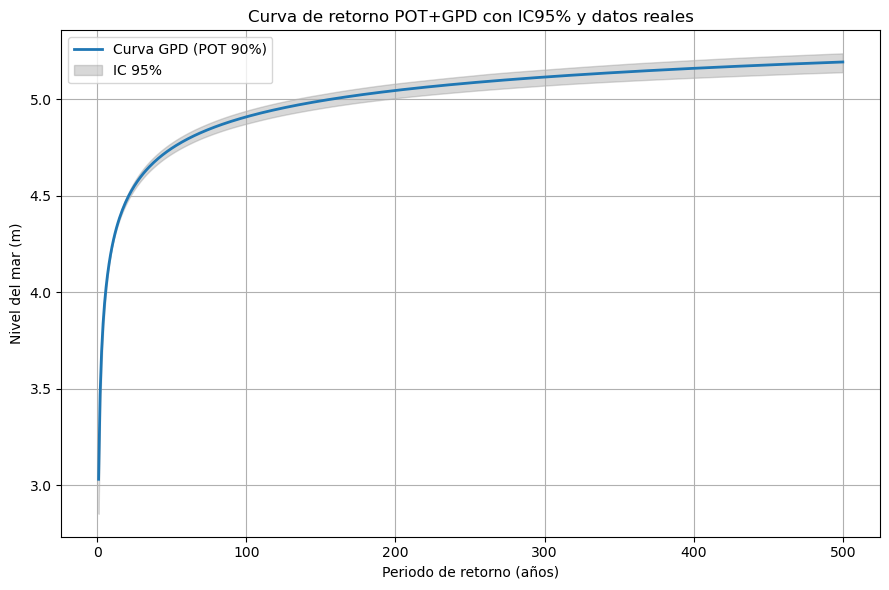

In [12]:
# Peaks over threshold (POT) mediante la Distribución Generalizada de Pareto (GPD)
threshold = np.percentile(nm_values, 90) # umbral en el percentil 90
exceedances = nm_values[nm_values > threshold] - threshold  # excedencias sobre el umbral

# Parámetros GPD
shape, loc, scale = genpareto.fit(exceedances, floc=0)

print(f"Shape (ξ): {shape}")
print(f"Scale (σ): {scale}")
print(f"Umbral (u): {threshold}")

# Serie de tiempos para la curva de retorno
T = np.linspace(1, 500, 500)  # años
lambda_exceed = len(exceedances) / len(nm_values)   # tasa de excedencias

# Curva principal
return_levels = threshold + (scale/shape) * ((T * lambda_exceed)**shape - 1)

#Intervalos de confianza al 95% 
n_boot = 500          # número de resamples
boot_curves = np.zeros((n_boot, len(T)))

for i in range(n_boot):
    # Muestreo bootstrap de excedencias
    boot_sample = np.random.choice(exceedances, size=len(exceedances), replace=True)

    # Ajuste GPD a la muestra bootstrap
    b_shape, b_loc, b_scale = genpareto.fit(boot_sample, floc=0)

    # Curva bootstrap
    boot_curve = threshold + (b_scale/b_shape) * ((T * lambda_exceed)**b_shape - 1)
    boot_curves[i, :] = boot_curve

# Intervalos al 95%
lower_CI = np.percentile(boot_curves, 2.5, axis=0)
upper_CI = np.percentile(boot_curves, 97.5, axis=0)


# Datos reales por encima del umbral
real_exceeding_values = nm_values[nm_values > threshold]


# Representación gráfica
plt.figure(figsize=(9, 6))
plt.plot(T, return_levels, label="Curva GPD (POT 90%)", linewidth=2)
plt.fill_between(T, lower_CI, upper_CI, color="gray", alpha=0.3,
                 label="IC 95%")
plt.xlabel("Periodo de retorno (años)")
plt.ylabel("Nivel del mar (m)")
plt.title("Curva de retorno POT+GPD con IC95% y datos reales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()